# Machine Learning Project

##### The goal of this project is to create a model that can predict for whether a customer can claim for Travel Insurance or not.

#### Problem Statement
##### Insurance companies take risks over customers. Risk management is a very important aspect of the insurance industry. Insurers consider every quantifiable factor to develop profiles of high and low insurance risks. Insurers collect vast amounts of information about policyholders and analyse the data. As a Data scientist in an insurance company, you need to analyse the available data and predict whether to approve the insurance or not.


##### The Steps performed will be mentioned as we go through the project.

In [1]:
# Basic Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cross-Validation
from sklearn.model_selection import train_test_split

# LabelEncoding
from sklearn.preprocessing import LabelEncoder

# Evaluation
from sklearn.metrics import classification_report

# Scaling
from sklearn.preprocessing import MinMaxScaler

# Ridge, Lasso
from sklearn.linear_model import Ridge, Lasso

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# GridSearchCV
from sklearn.model_selection import GridSearchCV

# Boosting, RandomForest
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

# Ensemble
from sklearn.ensemble import VotingClassifier, BaggingClassifier

# Feature Selection
from sklearn.feature_selection import chi2, SelectKBest

# SVM
from sklearn.svm import LinearSVC, SVC

# Skewness
from scipy.stats import skew

# Over and Under Sampling
from imblearn.over_sampling import RandomOverSampler 
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Pickle
import pickle

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the data and viewing a small part of it to get some understanding of the data.

df = pd.read_csv("data.csv")
print(df.shape)
df.head(8)

(50553, 12)


,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,NaN,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,NaN,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,NaN,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,NaN,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29
5,50349,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,64,THAILAND,49.5,29.70,NaN,36
6,9921,JZI,Airlines,Online,Value Plan,0,23,JAPAN,-69.0,24.15,F,26
7,21923,JZI,Airlines,Online,Basic Plan,0,31,HONG KONG,26.0,9.10,M,60


In [3]:
# We will get a list of the number of unique values for each column

df.nunique()

ID                      50553
Agency                     16
Agency Type                 2
Distribution Channel        2
Product Name               25
Claim                       2
Duration                  444
Destination               102
Net Sales                1053
Commision (in value)      964
Gender                      2
Age                        88
dtype: int64

In [4]:
# We will check for null values and the Dtype of each feature.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50553 entries, 0 to 50552
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    50553 non-null  int64  
 1   Agency                50553 non-null  object 
 2   Agency Type           50553 non-null  object 
 3   Distribution Channel  50553 non-null  object 
 4   Product Name          50553 non-null  object 
 5   Claim                 50553 non-null  int64  
 6   Duration              50553 non-null  int64  
 7   Destination           50553 non-null  object 
 8   Net Sales             50553 non-null  float64
 9   Commision (in value)  50553 non-null  float64
 10  Gender                14600 non-null  object 
 11  Age                   50553 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 4.6+ MB


In [5]:
((df.isnull().sum())*100)/len(df)

ID                       0.000000
Agency                   0.000000
Agency Type              0.000000
Distribution Channel     0.000000
Product Name             0.000000
Claim                    0.000000
Duration                 0.000000
Destination              0.000000
Net Sales                0.000000
Commision (in value)     0.000000
Gender                  71.119419
Age                      0.000000
dtype: float64

<b>71% of the Gender column have null values.
    <br>We will drop the column as there does not seem to be any other feature that could help us with filling in the missing data.

In [6]:
df.drop("Gender", axis=1, inplace=True)

In [7]:
# Having a look at all the unique values of each feature.

for cols in df:
    print("\n{:20} - {}" .format(cols.title(), df[cols].unique()))


Id                   - [ 3433  4339 34590 ... 54146 28667 50880]

Agency               - ['CWT' 'EPX' 'JZI' 'C2B' 'SSI' 'CSR' 'KML' 'RAB' 'ADM' 'JWT' 'LWC' 'TST'
 'ART' 'TTW' 'CBH' 'CCR']

Agency Type          - ['Travel Agency' 'Airlines']

Distribution Channel - ['Online' 'Offline']

Product Name         - ['Rental Vehicle Excess Insurance' 'Cancellation Plan'
 '2 way Comprehensive Plan' 'Value Plan' 'Basic Plan' 'Bronze Plan'
 'Ticket Protector' '1 way Comprehensive Plan' 'Comprehensive Plan'
 'Silver Plan' 'Premier Plan' 'Annual Silver Plan' 'Annual Gold Plan'
 'Single Trip Travel Protect Silver' 'Travel Cruise Protect' '24 Protect'
 'Annual Travel Protect Gold' 'Single Trip Travel Protect Platinum'
 'Single Trip Travel Protect Gold' 'Spouse or Parents Comprehensive Plan'
 'Gold Plan' 'Annual Travel Protect Silver'
 'Individual Comprehensive Plan' 'Annual Travel Protect Platinum'
 'Child Comprehensive Plan']

Claim                - [0 1]

Duration             - [   7   85   11   1

In [8]:
# Checking for correlation

df.corr()

,ID,Claim,Duration,Net Sales,Commision (in value),Age
ID,1.000000,0.040265,0.029771,0.084391,0.114668,0.009026
Claim,0.040265,1.000000,0.076442,0.138323,0.102009,-0.012106
Duration,0.029771,0.076442,1.000000,0.437004,0.349193,0.003212
Net Sales,0.084391,0.138323,0.437004,1.000000,0.657851,0.039119
Commision (in value),0.114668,0.102009,0.349193,0.657851,1.000000,0.119167
Age,0.009026,-0.012106,0.003212,0.039119,0.119167,1.000000


<b>We will also drop the ID column.
    <br>Each value is unique and does not seem to affect the data.

In [9]:
df.drop("ID", axis=1, inplace=True)

In [10]:
# Having a look at how many claims and non-claims are present in the dataset.
print(df["Claim"].value_counts(), "\n")
(df["Claim"].value_counts()*100)/len(df)

0    49812
1      741
Name: Claim, dtype: int64 



0    98.534212
1     1.465788
Name: Claim, dtype: float64

<b>We can see that there is a huge imbalance between the claims and non-claims.<br>
    We will build a baseline model before we perform Over Sampline and Under Sampling.

In [11]:
# Finding out how many customers have their age input as over 100yrs old

len(df[df["Age"] > 100])

795

<b>The below information from online states that a customer for Travel Insurance is regarded as a Senior citizen from the 71 years and above. And while some companies offer Travel Insurance up to a certain age, others do not have any restriction.</b><br>
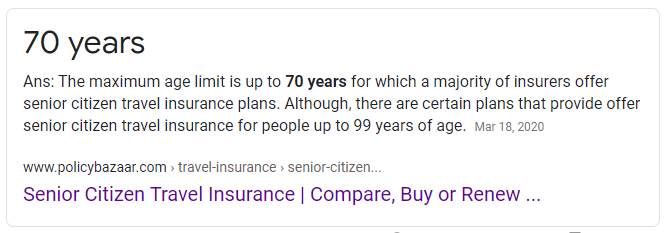

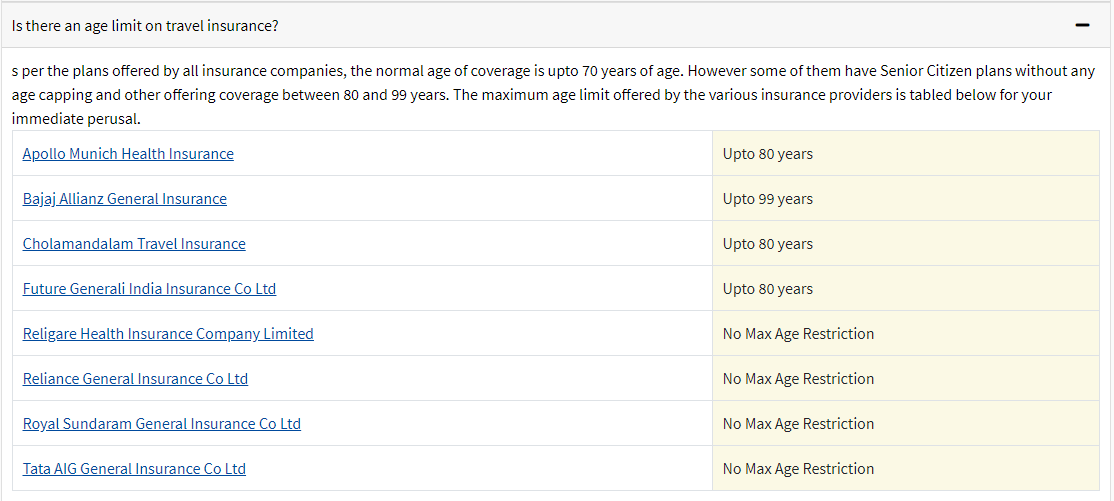

<b>Values above 100 years would most likely be outliers. However, we would need to see how to consider them (or change them) without effecting the data. One possible method is to take the mean of all customers above the age of 70, and replace the values over 100yrs with the new mean value.</b><br>

In [12]:
# Over here, create a variable to calculate the mean of all Senior customers.

mean_senior = df["Age"][df["Age"] > 70].mean()

<b>We will now separate the categorical and numerical data.

In [13]:
df.nunique()

Agency                    16
Agency Type                2
Distribution Channel       2
Product Name              25
Claim                      2
Duration                 444
Destination              102
Net Sales               1053
Commision (in value)     964
Age                       88
dtype: int64

<b>Apart from the target, "Claim", there are two more features that are bivariate - "Agency Type" and "Distribution Channel".
    <br>We could look to perform Hot Encoding on them.

<b>We will separate the Categorical and Numerical features, and explore them further.

In [14]:
cat = ["Agency", "Agency Type", "Distribution Channel", "Product Name", "Destination"]
num = ["Duration", "Net Sales", "Commision (in value)", "Age"]

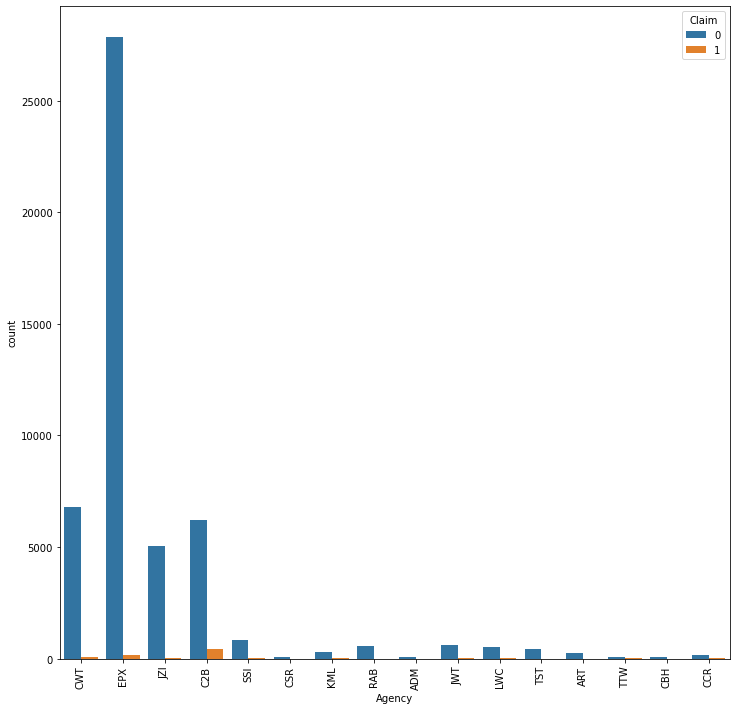

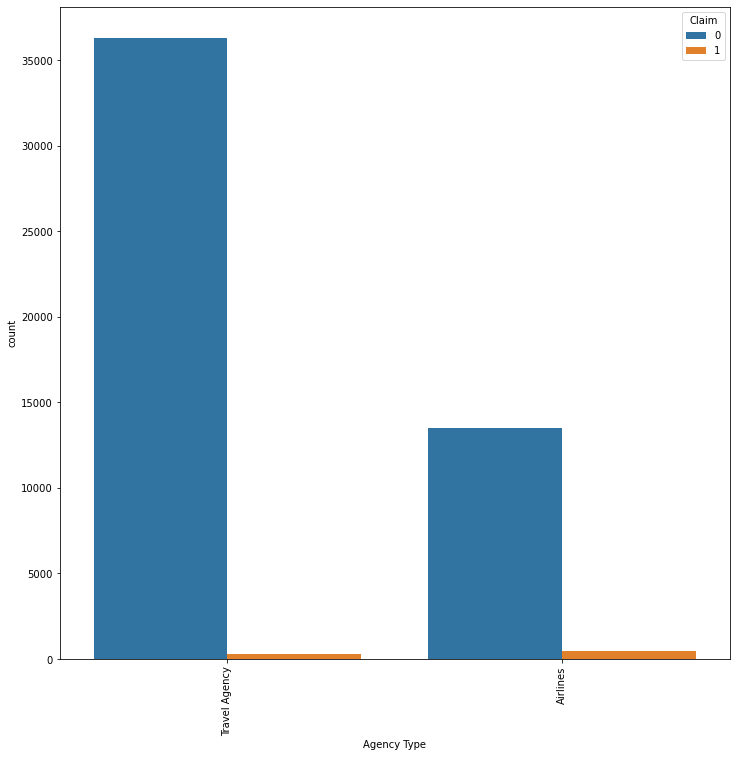

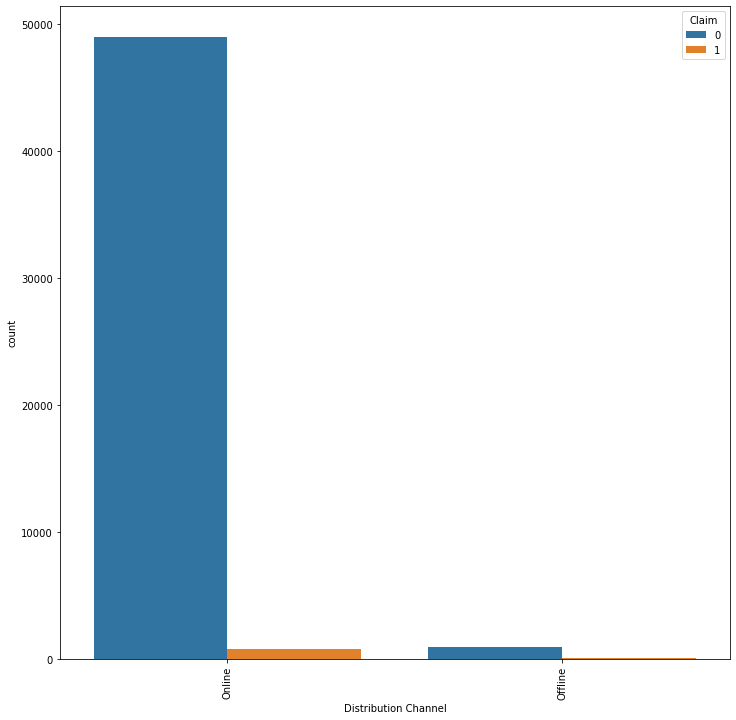

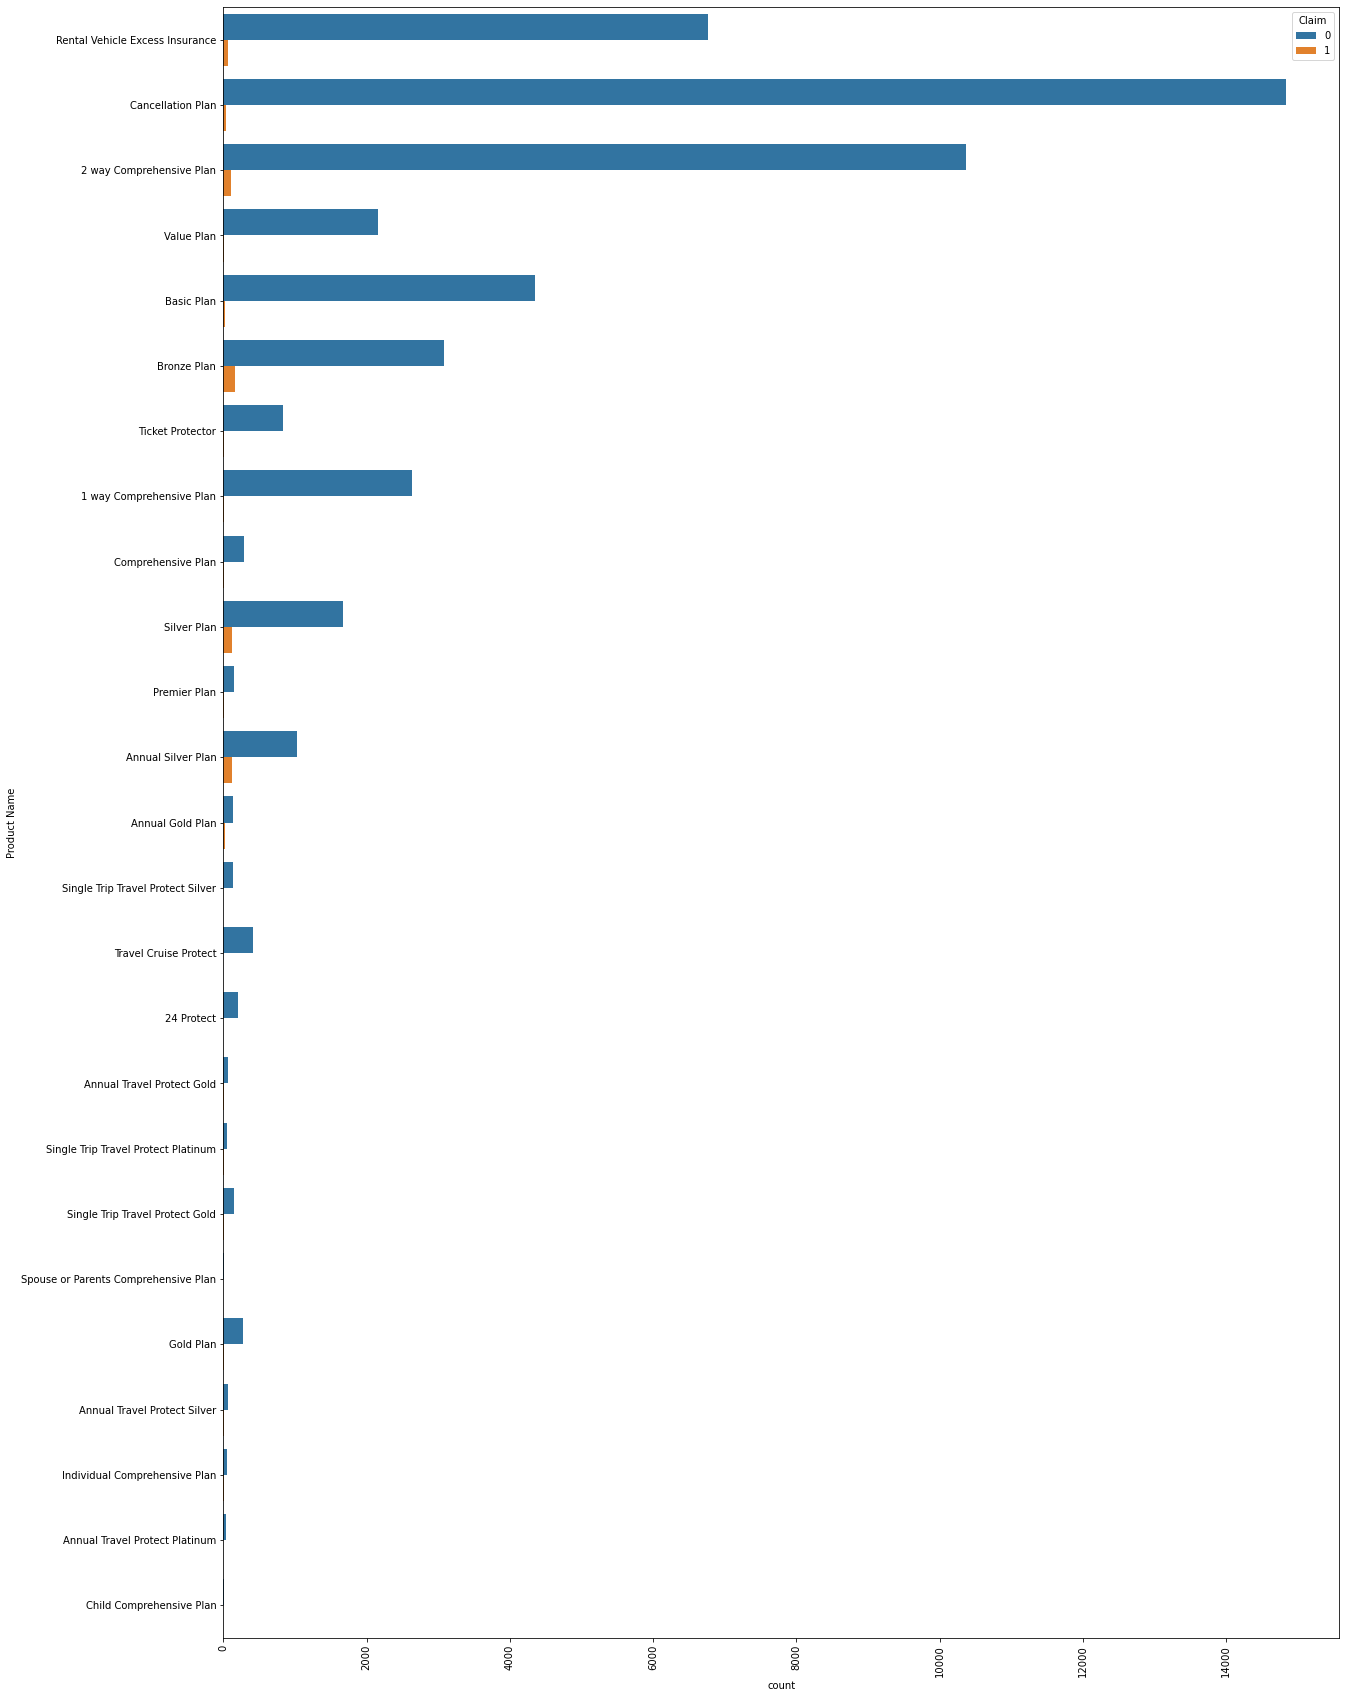

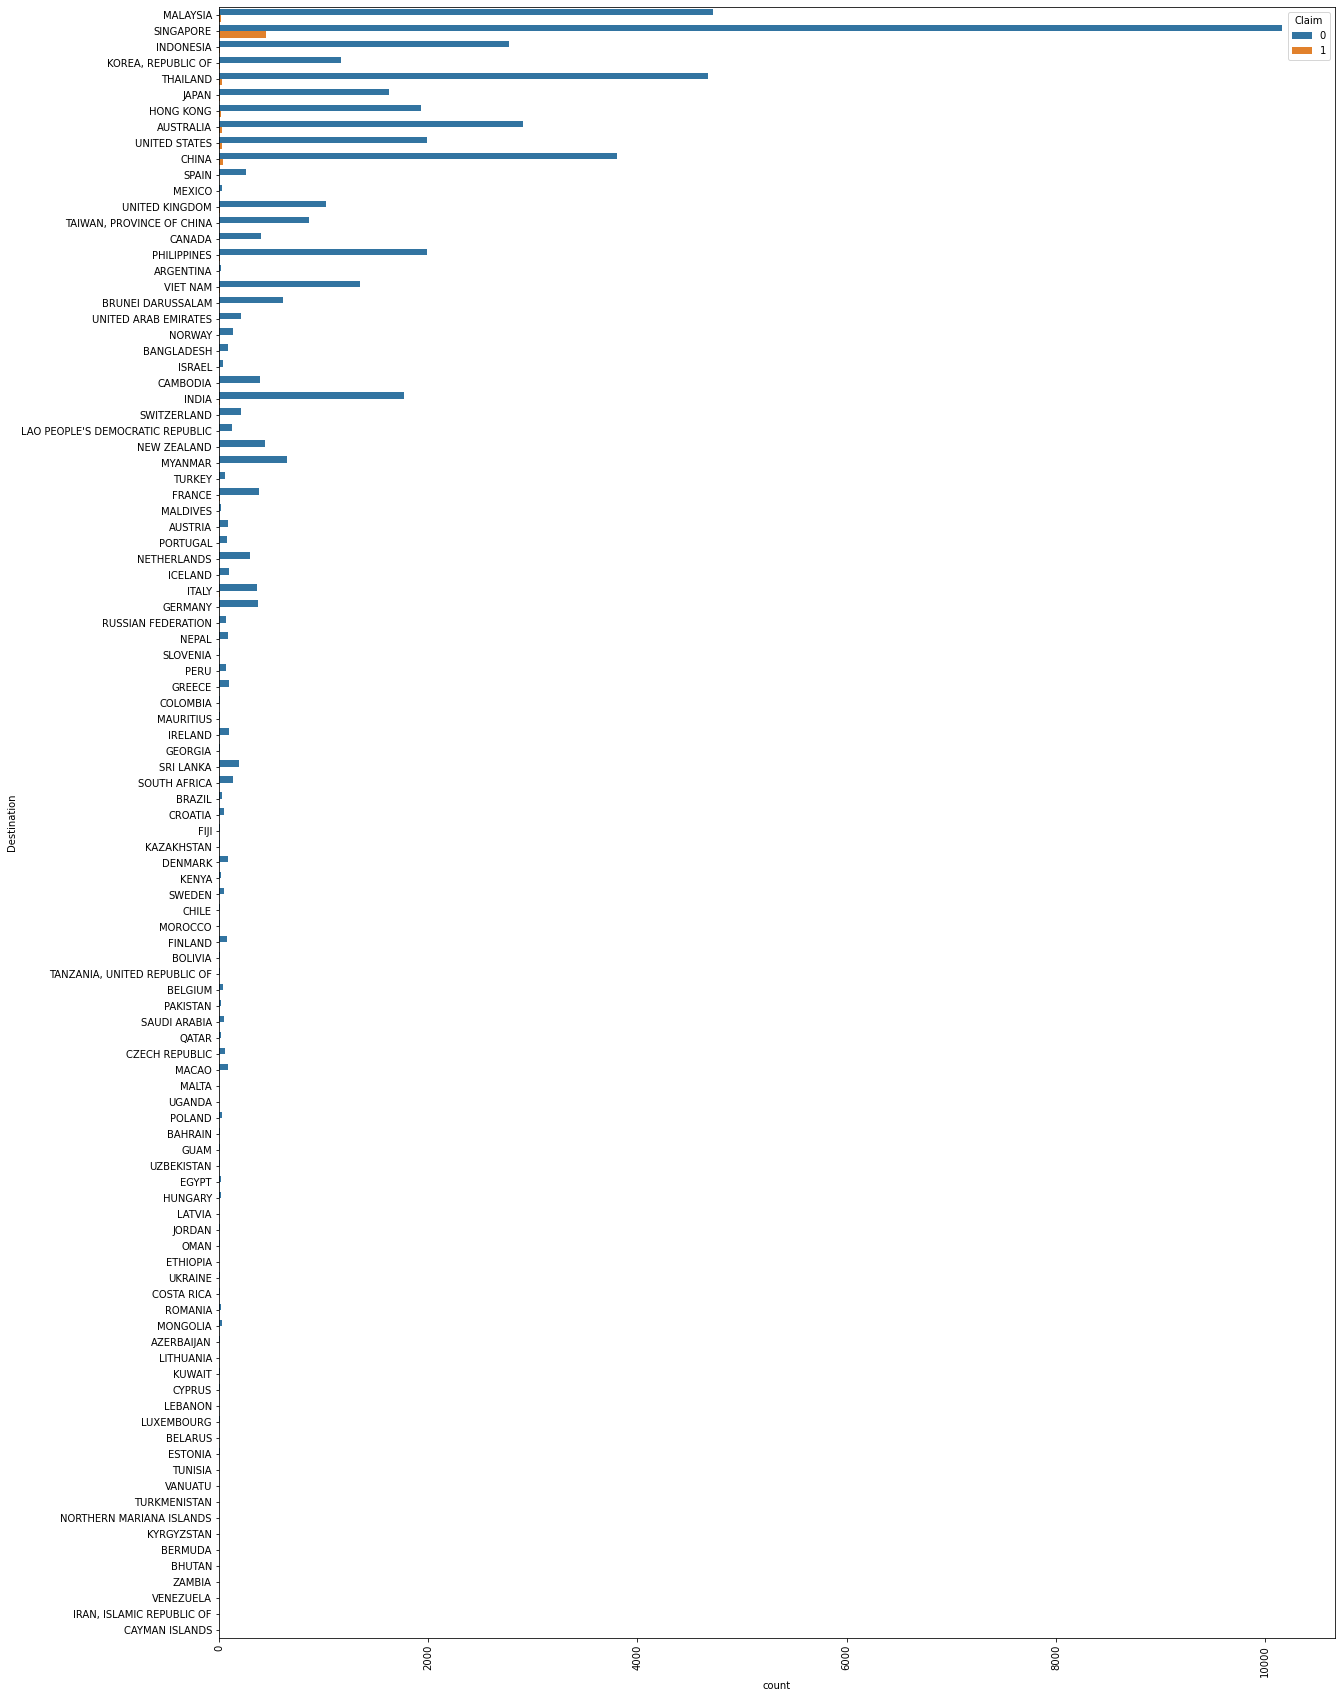

In [15]:
for cols in cat:
    if (cols == "Product Name") or (cols == "Destination"):
        plt.figure(figsize=(20,30))
        sns.countplot(data=df, hue=df["Claim"], y=cols)
    else:
        plt.figure(figsize=(12,12))
        sns.countplot(data=df, hue=df["Claim"], x=cols)
    plt.xticks(rotation=90)
    plt.show()

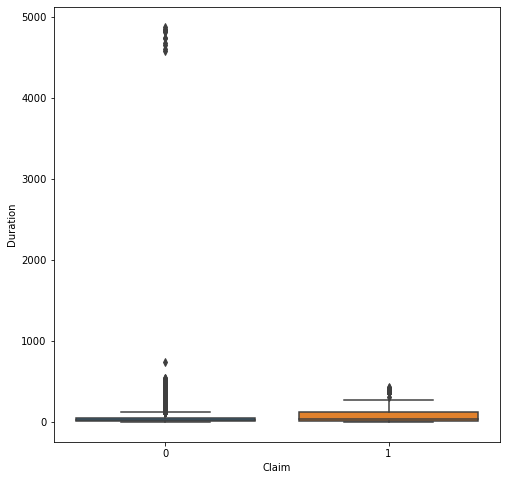

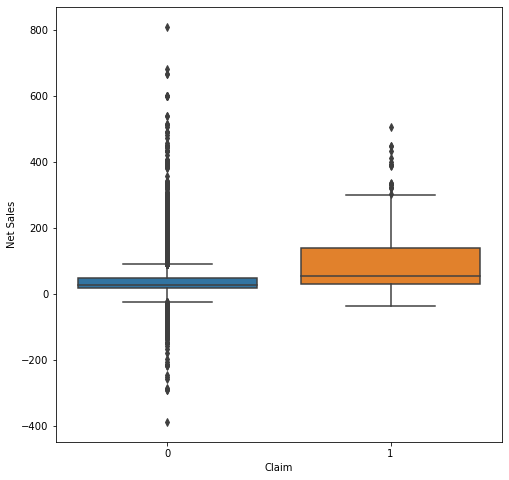

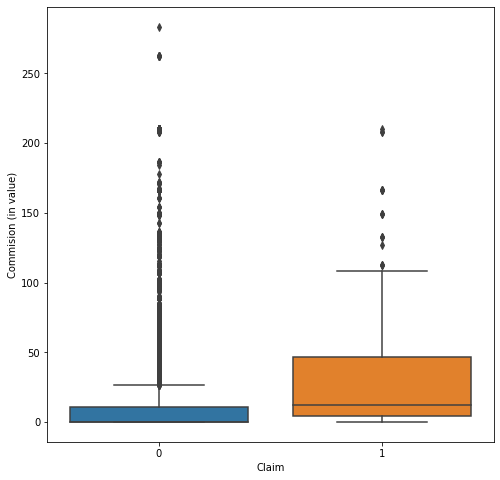

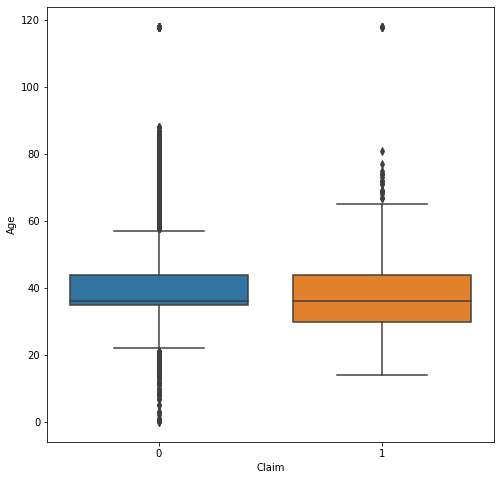

In [16]:
for cols in num:
    plt.figure(figsize=(8,8))
    sns.boxplot(data=df, x="Claim", y=cols)
    plt.show()

<b>We would need to manage only some of the outliers, and not all as it could lead to a lot of data loss. Apart from Age, another would be Duration. From the information below, we could replace all values in duration that are greater than 360, wtih 360.</b><br>

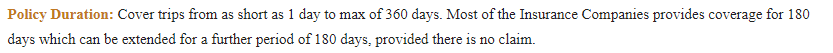
http://www.insurancepandit.com/travel/individual_travel_health_insurance.php

In [17]:
df.describe()

,Claim,Duration,Net Sales,Commision (in value),Age
count,50553.000000,50553.000000,50553.000000,50553.00000,50553.000000
mean,0.014658,49.425969,40.800977,9.83809,40.011236
std,0.120180,101.434647,48.899683,19.91004,14.076566
min,0.000000,-2.000000,-389.000000,0.00000,0.000000
25%,0.000000,9.000000,18.000000,0.00000,35.000000
50%,0.000000,22.000000,26.500000,0.00000,36.000000
75%,0.000000,53.000000,48.000000,11.55000,44.000000
max,1.000000,4881.000000,810.000000,283.50000,118.000000


Duration                  : 22.872063891229274


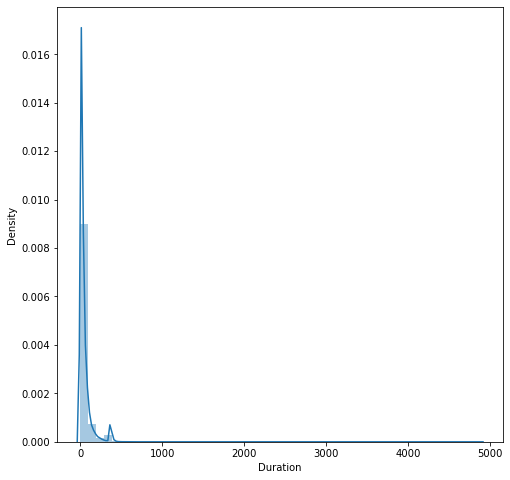

Net Sales                 : 3.3281441910342053


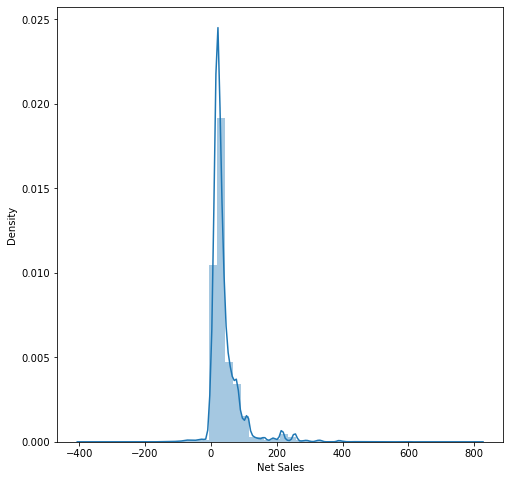

Commision (in value)      : 4.0780684356634636


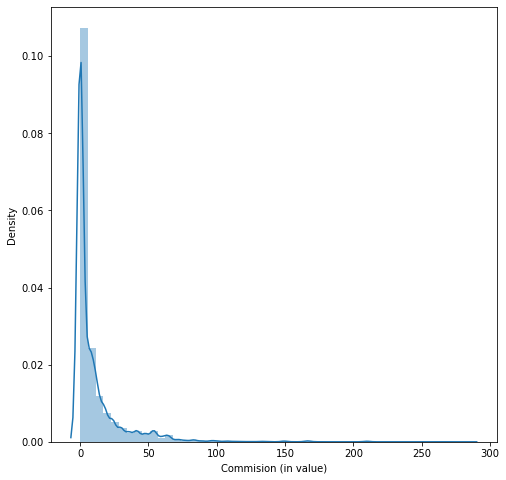

Age                       : 2.9783898494112435


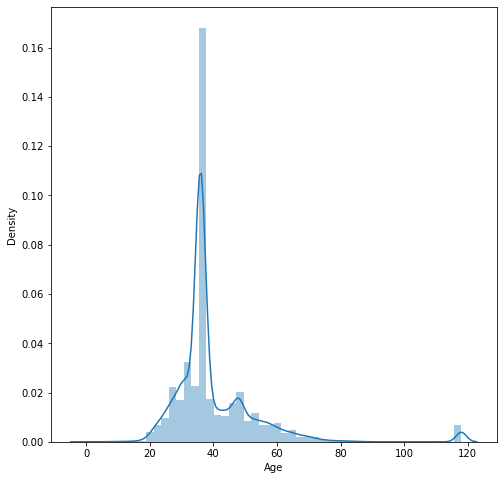

In [18]:
for cols in num:
    skew_cols = skew(df[cols])
    print("{:<25} : {}" .format(cols, skew_cols))
    plt.figure(figsize=(8,8))
    sns.distplot(df[cols])
    plt.show()

In [19]:
for cols in num:
    print("\n", cols)
    print(df[cols].value_counts().sort_index())


 Duration
-2          1
-1          2
 0         54
 1        647
 2       1181
         ... 
 4815       1
 4829       1
 4844       1
 4857       1
 4881       1
Name: Duration, Length: 444, dtype: int64

 Net Sales
-389.00    1
-291.75    2
-289.00    1
-287.10    1
-259.20    1
          ..
 539.00    1
 599.00    5
 666.00    2
 682.00    1
 810.00    1
Name: Net Sales, Length: 1053, dtype: int64

 Commision (in value)
0.00      28079
0.02         11
0.04          1
0.05          9
0.09         10
          ...  
209.95        2
210.21       33
262.60        2
262.76        6
283.50        1
Name: Commision (in value), Length: 964, dtype: int64

 Age
0        2
1        4
2        1
3        4
5        3
      ... 
85       9
86       3
87       6
88       4
118    795
Name: Age, Length: 88, dtype: int64


<b>There is some skewness within the data. This will be handled later on.

In [20]:
# The entries where the duration is -ve, we will drop those rows.

duration = df[df["Duration"] < 0].index
df.drop(duration, inplace=True)

In [21]:
df[(df["Net Sales"] < 0) & (df["Claim"] == 0)]

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
6,JZI,Airlines,Online,Value Plan,0,23,JAPAN,-69.0,24.15,26
128,EPX,Travel Agency,Online,Cancellation Plan,0,192,CANADA,-80.0,0.00,37
139,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,55,CHINA,-77.0,0.00,46
173,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,198,NETHERLANDS,-9.9,5.94,31
336,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,109,AUSTRALIA,-19.8,11.88,31
...,...,...,...,...,...,...,...,...,...,...
50121,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,81,JAPAN,-99.0,59.40,45
50149,ART,Airlines,Online,24 Protect,0,2,MALAYSIA,-1.4,0.49,118
50177,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,75,UNITED STATES,-49.5,29.70,49
50394,JZI,Airlines,Online,Basic Plan,0,15,VIET NAM,-22.0,7.70,57


In [22]:
df[(df["Net Sales"] < 0) & (df["Claim"] == 1)]

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
6597,EPX,Travel Agency,Online,Cancellation Plan,1,28,SPAIN,-10.0,0.0,36
26666,JZI,Airlines,Online,Basic Plan,1,3,HONG KONG,-22.0,7.7,59
30272,EPX,Travel Agency,Online,2 way Comprehensive Plan,1,128,"KOREA, REPUBLIC OF",-37.0,0.0,36


<hr>

### LabelEncoding, One Hot Encoding, Frequency Encoding

##### Label Encoding -> Each unique categorical value for a feature is replaced with a discrete number.
##### One Hot Encoding -> A separate column is created for each unique categorical value from a feature.
##### Frequency Encoding -> Finding out the frequency of each categorical unique value from a feature.

<b>To get a better model, we would be running this file a few times as the model would have either one type of encoding, or a combination of all. Accordingly, the best models will be selected.<br>
Once selected, if a particular encoding type lowered the scores, we will change the block code type to 'Raw'.

In [23]:
# Label Encoding

for cols in cat:
    le = LabelEncoder()
    df[cols] = le.fit_transform(df[cols])

df.head(8)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,6,1,1,16,0,7,56,0.0,17.82,31
1,7,1,1,10,0,85,79,69.0,0.00,36
2,6,1,1,16,0,11,56,19.8,11.88,75
3,7,1,1,1,0,16,38,20.0,0.00,32
4,7,1,1,10,0,10,47,15.0,0.00,29
5,6,1,1,16,0,64,88,49.5,29.70,36
6,9,0,1,24,0,23,43,-69.0,24.15,26
7,9,0,1,8,0,31,34,26.0,9.10,60


<hr>

In [24]:
X = df.drop("Claim", axis=1)
y = df["Claim"]

### Fit and Predict
<b>Function to train, fit, and predict the model, and to display the report

In [25]:
def model_sel(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return classification_report(y_test, y_pred)

<hr>

### All Models
<b>Function where all the models will be defined and then passed to 'model_sel' for the model to be created.

In [26]:
def models(X, y):
    lr = LogisticRegression()
    dtc = DecisionTreeClassifier()
    abc = AdaBoostClassifier(n_estimators=100)
    gbc = GradientBoostingClassifier(n_estimators=100)
    xbc = XGBClassifier(n_estimators=200, reg_alpha=1)
    rfc = RandomForestClassifier()
    lsvc = LinearSVC(random_state=1)
    svc = SVC(random_state=1)
    print("{} \n {}\n" .format("LOGISTIC REGRESSION", model_sel(lr, X, y)))
    print("{} \n {}\n" .format("DECISION TREE", model_sel(dtc, X, y)))
    print("{} \n {}\n" .format("ADABOOST", model_sel(abc, X, y)))
    print("{} \n {}\n" .format("GRADIENT BOOST", model_sel(gbc, X, y)))
    print("{} \n {}\n" .format("XGBOOST", model_sel(xbc, X, y)))
    print("{} \n {}\n" .format("RANDOM FOREST", model_sel(rfc, X, y)))
    print("{} \n {}\n" .format("LINEAR SVM", model_sel(lsvc, X, y)))
    print("{} \n {}\n" .format("SVM", model_sel(svc, X, y)))
    
    return lr, abc, gbc, xbc, rfc, lsvc, svc

<hr>

### Manual Under Sampling
<b>We will match the number of non-claims to claims. Below are the steps<br>
    1. Get the count of undersampled and oversampled Claims.<br>
    2. Create new variable that will randomly select the same number of oversampled Claims as there is undersampled.<br>
    3. Concatenate the two into a numpy array.<br>
    4. Create a new DataFrame taking the indexes from the concatenated array.<br>
    5. Use this DataFrame to run the models.<br>

In [27]:
def sampling(df):
    min_claim = len(df[df["Claim"] == 1])
    min_claim_ind = df[df["Claim"] == 1].index
    
    maj_claim_ind = df[df["Claim"] == 0].index
    
    random_major = np.random.choice(maj_claim_ind, min_claim, replace=False)
    
    sample_ind = np.concatenate([min_claim_ind, random_major])
    
    under_sample = df.loc[sample_ind]
    
    # print(sns.countplot(data=under_sample, x="Claim"))
    
    X = under_sample.loc[:, df.columns!="Claim"]
    y = under_sample.loc[:, df.columns=="Claim"]
    
    lr, abc, gbc, xbc, rfc, lsvc, svc = models(X, y)
    return lr, abc, gbc, xbc, rfc, lsvc, svc, X, y

<hr>

### Over Sampling

<b>The number of minority values will be made to equal the number of majority values.

In [28]:
def over_sample():
    X = df.drop("Claim", axis=1)
    y = df["Claim"]
    print(Counter(y))
    oversample = RandomOverSampler(sampling_strategy='minority')
    X_over, y_over = oversample.fit_resample(X, y)
    print(Counter(y_over))
    
    lr, abc, gbc, xbc, rfc, lsvc, svc = models(X_over, y_over)
    return lr, abc, gbc, xbc, rfc, lsvc, svc, X_over, y_over

<hr>

### Under Sampling

<b>The number of majority values will be reduced down to equal the number of minority values.

In [29]:
def under_sample():
    X = df.drop("Claim", axis=1)
    y = df["Claim"]
    print(Counter(y))
    undersample = RandomUnderSampler(sampling_strategy='majority')
    X_under, y_under = undersample.fit_resample(X, y)
    print(Counter(y_under))
    
    lr, abc, gbc, xbc, rfc, lsvc, svc = models(X_under, y_under)
    return lr, abc, gbc, xbc, rfc, lsvc, svc, X_under, y_under

<hr>

### GridSearchCV
<b>By passing the model along with parameters that it can carry, this function will iterate using the model parameters, and deliver the best model.

In [30]:
def gridsearch(model, paramater, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    gscv = GridSearchCV(estimator=model, param_grid=parameter)
    gscv.fit(X_train, y_train)
    y_pred = gscv.predict(X_test)
    print(classification_report(y_test, y_pred))
    print(gscv.best_estimator_)
    return gscv

<hr><hr>

### First Baseline Models
<b>We will build four models - No Sampling, Manual Under Sampling, Over Sampled, Under Sampled.<br>

In [31]:
# Without Sampling

lr, abc, gbc, xbc, rfc, lscv, svc = models(X, y)

LOGISTIC REGRESSION 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     14952
           1       0.00      0.00      0.00       213

    accuracy                           0.99     15165
   macro avg       0.49      0.50      0.50     15165
weighted avg       0.97      0.99      0.98     15165


DECISION TREE 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98     14952
           1       0.05      0.06      0.05       213

    accuracy                           0.97     15165
   macro avg       0.52      0.52      0.52     15165
weighted avg       0.97      0.97      0.97     15165


ADABOOST 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     14952
           1       0.00      0.00      0.00       213

    accuracy                           0.99     15165
   macro avg       0.49      0.50      0.50     15165
weighted avg       0.97

In [32]:
# With manual Under Sampling

lr_sample, abc_sample, gbc_sample, xbc_sample, rfc_sample, lsvc_sample, svc_sample, X, y = sampling(df)

LOGISTIC REGRESSION 
               precision    recall  f1-score   support

           0       0.70      0.87      0.78       227
           1       0.82      0.61      0.70       218

    accuracy                           0.74       445
   macro avg       0.76      0.74      0.74       445
weighted avg       0.76      0.74      0.74       445


DECISION TREE 
               precision    recall  f1-score   support

           0       0.68      0.69      0.69       227
           1       0.67      0.66      0.67       218

    accuracy                           0.68       445
   macro avg       0.68      0.68      0.68       445
weighted avg       0.68      0.68      0.68       445


ADABOOST 
               precision    recall  f1-score   support

           0       0.74      0.77      0.75       227
           1       0.75      0.71      0.73       218

    accuracy                           0.74       445
   macro avg       0.74      0.74      0.74       445
weighted avg       0.74

In [33]:
# Over Sampled

lr_over, abc, gbc_over, xbc_over, rfc_over, lsvc_over, svc_over, X, y = over_sample()

Counter({0: 49809, 1: 741})
Counter({0: 49809, 1: 49809})
LOGISTIC REGRESSION 
               precision    recall  f1-score   support

           0       0.71      0.84      0.77     15096
           1       0.79      0.65      0.71     14790

    accuracy                           0.74     29886
   macro avg       0.75      0.74      0.74     29886
weighted avg       0.75      0.74      0.74     29886


DECISION TREE 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     15096
           1       0.98      1.00      0.99     14790

    accuracy                           0.99     29886
   macro avg       0.99      0.99      0.99     29886
weighted avg       0.99      0.99      0.99     29886


ADABOOST 
               precision    recall  f1-score   support

           0       0.77      0.80      0.78     15096
           1       0.78      0.75      0.77     14790

    accuracy                           0.77     29886
   macro avg       

In [34]:
# Under Sampled

lr_under, abc_under, gbc_under, xbc_under, rfc_under, lsvc_under, svc_under, X, y = under_sample()

Counter({0: 49809, 1: 741})
Counter({0: 741, 1: 741})
LOGISTIC REGRESSION 
               precision    recall  f1-score   support

           0       0.69      0.79      0.73       218
           1       0.76      0.65      0.70       227

    accuracy                           0.72       445
   macro avg       0.72      0.72      0.72       445
weighted avg       0.72      0.72      0.72       445


DECISION TREE 
               precision    recall  f1-score   support

           0       0.63      0.68      0.66       218
           1       0.67      0.62      0.65       227

    accuracy                           0.65       445
   macro avg       0.65      0.65      0.65       445
weighted avg       0.65      0.65      0.65       445


ADABOOST 
               precision    recall  f1-score   support

           0       0.70      0.75      0.72       218
           1       0.74      0.69      0.71       227

    accuracy                           0.72       445
   macro avg       0.72

#### Result
<b>The scores are all zero for the base model without Sampling.</b><br>
<b>For all the sampling models, the scores increased drastically. Over Sampled models produced the best results.</b><br>
<b>Going forward, we will not run the models where no sampling is done.</b><br>

<hr>

### Outliers

<b>As mentioned earlier, those over 100yrs will be replaced by the mean of Senior aged customers, and where the Duration is more that 360 will be replaced by 360.

In [35]:
df["Age"][df["Age"] > 60] = mean_senior

In [36]:
df["Duration"][df["Duration"] > 360] = 360

In [37]:
X = df.drop("Claim", axis=1)
y = df["Claim"]

In [38]:
# lr_out, abc_out, gbc_out, xbc_out, rfc_out, lsvc_out, svc_out = models(X, y)

In [39]:
# Manual Under Sampling and Outliers

lr_out_sample, abc_out_sample, gbc_out_sample, xbc_out_sample, rfc_out_sample, lsvc_out_sample, svc_out_sample, X, y = sampling(df)

LOGISTIC REGRESSION 
               precision    recall  f1-score   support

           0       0.70      0.85      0.77       227
           1       0.80      0.63      0.70       218

    accuracy                           0.74       445
   macro avg       0.75      0.74      0.74       445
weighted avg       0.75      0.74      0.74       445


DECISION TREE 
               precision    recall  f1-score   support

           0       0.69      0.72      0.71       227
           1       0.70      0.66      0.68       218

    accuracy                           0.69       445
   macro avg       0.69      0.69      0.69       445
weighted avg       0.69      0.69      0.69       445


ADABOOST 
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       227
           1       0.80      0.73      0.76       218

    accuracy                           0.78       445
   macro avg       0.78      0.77      0.77       445
weighted avg       0.78

In [40]:
# Over Sampling and Outliers

lr_out_over, abc_out_over, gbc_out_over, xbc_out_over, rfc_out_over, lsvc_out_over, svc_out_over, X, y = over_sample()

Counter({0: 49809, 1: 741})
Counter({0: 49809, 1: 49809})
LOGISTIC REGRESSION 
               precision    recall  f1-score   support

           0       0.71      0.84      0.77     15096
           1       0.80      0.64      0.71     14790

    accuracy                           0.74     29886
   macro avg       0.75      0.74      0.74     29886
weighted avg       0.75      0.74      0.74     29886


DECISION TREE 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     15096
           1       0.97      1.00      0.98     14790

    accuracy                           0.98     29886
   macro avg       0.98      0.98      0.98     29886
weighted avg       0.98      0.98      0.98     29886


ADABOOST 
               precision    recall  f1-score   support

           0       0.77      0.80      0.78     15096
           1       0.78      0.75      0.77     14790

    accuracy                           0.77     29886
   macro avg       

In [41]:
# Under Sampling and Outliers

lr_out_under, abc_out_under, gbc_out_under, xbc_out_under, rfc_out_under, lsvc_out_under, svc_out_under, X, y = under_sample()

Counter({0: 49809, 1: 741})
Counter({0: 741, 1: 741})
LOGISTIC REGRESSION 
               precision    recall  f1-score   support

           0       0.68      0.81      0.74       218
           1       0.78      0.64      0.70       227

    accuracy                           0.72       445
   macro avg       0.73      0.72      0.72       445
weighted avg       0.73      0.72      0.72       445


DECISION TREE 
               precision    recall  f1-score   support

           0       0.65      0.66      0.66       218
           1       0.67      0.66      0.67       227

    accuracy                           0.66       445
   macro avg       0.66      0.66      0.66       445
weighted avg       0.66      0.66      0.66       445


ADABOOST 
               precision    recall  f1-score   support

           0       0.68      0.76      0.72       218
           1       0.74      0.66      0.70       227

    accuracy                           0.71       445
   macro avg       0.71

<hr>

### Skewness

In [42]:
print("{:<15} : {}" .format("Duration", skew(df["Duration"])))
print("{:<15} : {}" .format("Commision (in value)", skew(df["Commision (in value)"])))
print("{:<15} : {}" .format("Age", skew(df["Age"]))) 

Duration        : 3.0381146944318584
Commision (in value) : 4.077929249694879
Age             : 2.5043395070093535


In [43]:
df["Duration"] = np.sqrt(df["Duration"])
df["Commision (in value)"] = np.sqrt(df["Commision (in value)"])
df["Age"] = np.sqrt(df["Age"])

In [44]:
print("{:<15} : {}" .format("Duration", skew(df["Duration"])))
print("{:<15} : {}" .format("Commision (in value)", skew(df["Commision (in value)"])))
print("{:<15} : {}" .format("Age", skew(df["Age"]))) 

Duration        : 1.6361035948952554
Commision (in value) : 1.3513398200630384
Age             : 1.9417002579049916


In [45]:
X = df.drop("Claim", axis=1)
y = df["Claim"]

In [46]:
# lr_skew, abc_skew, gbc_skew, xbc_skew, rfc_skew, lsvc_skew, svc_skew = models(X, y)

In [47]:
# Manual Under Sampling and Skewing

lr_skew_sample, abc_skew_sample, gbc_skew_sample, xbc_skew_sample, rfc_skew_sample, lsvc_skew_sample, svc_skew_sample, X, y = sampling(df)

LOGISTIC REGRESSION 
               precision    recall  f1-score   support

           0       0.70      0.85      0.77       227
           1       0.80      0.61      0.70       218

    accuracy                           0.74       445
   macro avg       0.75      0.73      0.73       445
weighted avg       0.75      0.74      0.73       445


DECISION TREE 
               precision    recall  f1-score   support

           0       0.67      0.63      0.65       227
           1       0.64      0.67      0.66       218

    accuracy                           0.65       445
   macro avg       0.65      0.65      0.65       445
weighted avg       0.65      0.65      0.65       445


ADABOOST 
               precision    recall  f1-score   support

           0       0.73      0.76      0.75       227
           1       0.74      0.71      0.72       218

    accuracy                           0.73       445
   macro avg       0.74      0.73      0.73       445
weighted avg       0.74

In [48]:
# Over Sampling and Skewing

lr_skew_over, abc_skew_over, gbc_skew_over, xbc_skew_over, rfc_skew_over, lsvc_skew_over, svc_skew_over, X, y = over_sample()

Counter({0: 49809, 1: 741})
Counter({0: 49809, 1: 49809})
LOGISTIC REGRESSION 
               precision    recall  f1-score   support

           0       0.72      0.82      0.76     15096
           1       0.78      0.67      0.72     14790

    accuracy                           0.74     29886
   macro avg       0.75      0.74      0.74     29886
weighted avg       0.75      0.74      0.74     29886


DECISION TREE 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     15096
           1       0.97      1.00      0.98     14790

    accuracy                           0.98     29886
   macro avg       0.99      0.98      0.98     29886
weighted avg       0.99      0.98      0.98     29886


ADABOOST 
               precision    recall  f1-score   support

           0       0.78      0.79      0.78     15096
           1       0.78      0.77      0.78     14790

    accuracy                           0.78     29886
   macro avg       

In [49]:
# Under Sampling and Skewing

lr_skew_under, abc_skew_under, gbc_skew_under, xbc_skew_under, rfc_skew_under, lsvc_skew_under, svc_skew_under, X, y = under_sample()

Counter({0: 49809, 1: 741})
Counter({0: 741, 1: 741})
LOGISTIC REGRESSION 
               precision    recall  f1-score   support

           0       0.70      0.83      0.76       218
           1       0.80      0.65      0.72       227

    accuracy                           0.74       445
   macro avg       0.75      0.74      0.74       445
weighted avg       0.75      0.74      0.74       445


DECISION TREE 
               precision    recall  f1-score   support

           0       0.63      0.72      0.67       218
           1       0.69      0.59      0.64       227

    accuracy                           0.65       445
   macro avg       0.66      0.66      0.65       445
weighted avg       0.66      0.65      0.65       445


ADABOOST 
               precision    recall  f1-score   support

           0       0.71      0.79      0.75       218
           1       0.78      0.69      0.73       227

    accuracy                           0.74       445
   macro avg       0.74

<hr>

### Performing Chi-squared test

In [50]:
len(df.columns)

10

In [51]:
X = df.drop("Claim", axis=1)
y = df["Claim"]

In [52]:
X_cols = []

for col in X:
    X_cols.append(col)

In [53]:
def model_chi(model, X):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    
    chi_test = SelectKBest(score_func=chi2, k=6)

    X_train_chi = chi_test.fit_transform(X_train, y_train)
    X_test_chi = chi_test.transform(X_test)
    
    model.fit(X_train_chi, y_train)
    y_pred = model.predict(X_test_chi)
    
    print(classification_report(y_test, y_pred))
    
    num = 0
    
    for each in chi_test.scores_:
        print("{:2} {:20} - {}" .format(num, X_cols[num], each))
        num += 1

In [54]:
def model_new(X):
    lr = LogisticRegression()
    dtc = DecisionTreeClassifier(criterion="entropy")
    abc = AdaBoostClassifier(n_estimators=100)
    gbc = GradientBoostingClassifier(n_estimators=100)
    xbc = XGBClassifier(n_estimators=200, reg_alpha=1)
    rfc = RandomForestClassifier()
    print("{} \n {}\n" .format("LOGISTIC REGRESSION", model_chi(lr,X)))
    print("{} \n {}\n" .format("DECISION TREE", model_sel(dtc,X)))
    print("{} \n {}\n" .format("ADABOOST", model_chi(abc,X)))
    print("{} \n {}\n" .format("GRADIENT BOOST", model_chi(gbc,X)))
    print("{} \n {}\n" .format("XGBOOST", model_chi(xbc,X)))
    print("{} \n {}\n" .format("RANDOM FOREST", model_chi(rfc,X)))
    
    return lr, abc, gbc, xbc, rfc

lr_chi, abc_chi, gbc_chi, xbc_chi, rfc_chi = model_new(X)

<b>RandomForest still has the best score.

In [55]:
X = df.drop("Claim", axis=1)
y = df["Claim"]

In [56]:
X_cols = []

for col in X:
    X_cols.append(col)

In [57]:
# lr_chi, abc_chi, gbc_chi, xbc_chi, rfc_chi = model_new(X)

<hr>

### Scaling

In [58]:
df_old = df.copy(deep=True)

In [59]:
mm = MinMaxScaler()

X = df.drop("Claim", axis=1)
cols = X.columns.to_list()
df[cols] = mm.fit_transform(df[cols])

In [60]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,0.400000,1.0,1.0,0.666667,0,0.139443,0.554455,0.324437,0.250713,0.553716
1,0.466667,1.0,1.0,0.416667,0,0.485913,0.782178,0.381985,0.000000,0.596702
2,0.400000,1.0,1.0,0.666667,0,0.174801,0.554455,0.340951,0.204707,1.000000
3,0.466667,1.0,1.0,0.041667,0,0.210819,0.376238,0.341118,0.000000,0.562576
4,0.466667,1.0,1.0,0.416667,0,0.166667,0.465347,0.336947,0.000000,0.535557


In [61]:
X = df.drop("Claim", axis=1)
y = df["Claim"]

In [62]:
# lr_scale, abc_scale, gbc_scale, xbc_scale, rfc_scale, lsvc_scale, svc_scale = models(X, y)

In [63]:
# Manual Under Sampling and Scalling 

lr_scale_sample, abc_scale_sample, gbc_scale_sample, xbc_scale_sample, rfc_scale_sample, lsvc_scale_sample, svc_scale_sample, X, y = sampling(df)

LOGISTIC REGRESSION 
               precision    recall  f1-score   support

           0       0.69      0.81      0.75       227
           1       0.76      0.63      0.69       218

    accuracy                           0.72       445
   macro avg       0.73      0.72      0.72       445
weighted avg       0.73      0.72      0.72       445


DECISION TREE 
               precision    recall  f1-score   support

           0       0.67      0.64      0.66       227
           1       0.64      0.68      0.66       218

    accuracy                           0.66       445
   macro avg       0.66      0.66      0.66       445
weighted avg       0.66      0.66      0.66       445


ADABOOST 
               precision    recall  f1-score   support

           0       0.73      0.75      0.74       227
           1       0.74      0.72      0.73       218

    accuracy                           0.73       445
   macro avg       0.73      0.73      0.73       445
weighted avg       0.73

In [64]:
# Over Sampling and Scalling

lr_scale_over, abc_scale_over, gbc_scale_over, xbc_scale_over, rfc_scale_over, lsvc_scale_over, svc_scale_over, X, y = over_sample()

Counter({0: 49809, 1: 741})
Counter({0: 49809, 1: 49809})
LOGISTIC REGRESSION 
               precision    recall  f1-score   support

           0       0.72      0.83      0.77     15096
           1       0.79      0.66      0.72     14790

    accuracy                           0.75     29886
   macro avg       0.75      0.75      0.75     29886
weighted avg       0.75      0.75      0.75     29886


DECISION TREE 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     15096
           1       0.97      1.00      0.98     14790

    accuracy                           0.98     29886
   macro avg       0.99      0.98      0.98     29886
weighted avg       0.99      0.98      0.98     29886


ADABOOST 
               precision    recall  f1-score   support

           0       0.77      0.80      0.78     15096
           1       0.79      0.76      0.77     14790

    accuracy                           0.78     29886
   macro avg       

In [65]:
# Under Sampling and Scalling

lr_scale_under, abc_scale_under, gbc_scale_under, xbc_scale_under, rfc_scale_under, lsvc_scale_under, svc_scale_under, X, y = under_sample()

Counter({0: 49809, 1: 741})
Counter({0: 741, 1: 741})
LOGISTIC REGRESSION 
               precision    recall  f1-score   support

           0       0.70      0.83      0.76       218
           1       0.81      0.66      0.72       227

    accuracy                           0.74       445
   macro avg       0.75      0.75      0.74       445
weighted avg       0.75      0.74      0.74       445


DECISION TREE 
               precision    recall  f1-score   support

           0       0.63      0.72      0.67       218
           1       0.69      0.60      0.64       227

    accuracy                           0.66       445
   macro avg       0.66      0.66      0.66       445
weighted avg       0.66      0.66      0.66       445


ADABOOST 
               precision    recall  f1-score   support

           0       0.71      0.82      0.76       218
           1       0.79      0.67      0.73       227

    accuracy                           0.74       445
   macro avg       0.75

<hr>

### Saving best model in a file through Pickle

In [67]:
file = open("TravelInsurance.ser", "wb")
pickle.dump(rfc_under, file)
file.close()

<hr>

### Below blocks of code are not in use anymore

<hr>

<hr><hr>

# Conclusion

<b>The overall project went through changes from start till the end.</b><br>

#### Version 1.0
<b>Most time was spent on this version. Here is all that was done - <br>
    1) Read and analyzed dataset.<br>
    2) Removed 'Gender' as it had 71% null values.<br>
    3) Performed Label Encoding.<br>
    4) Created defintions for fitting and predicting models.<br>
    5) Skewness, Outliers, Scaling, Chi-Squared Test, Boosting.</b><br><br>
<b><u>Result - </u>The scores achieved for each and every model in this version was zero (as you can see below). A different approach was required.</b><br><br>

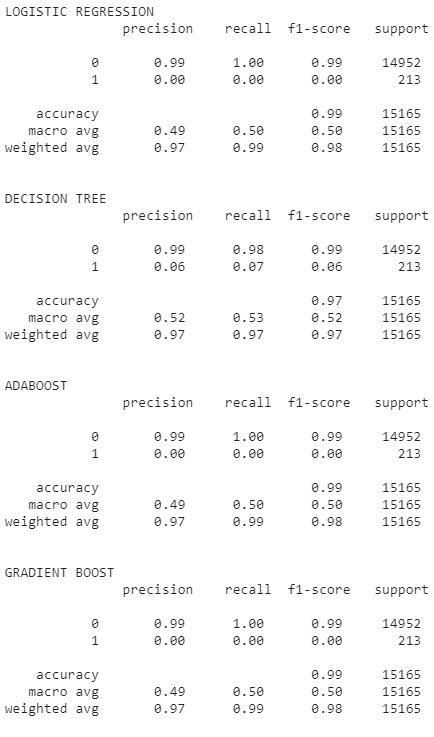
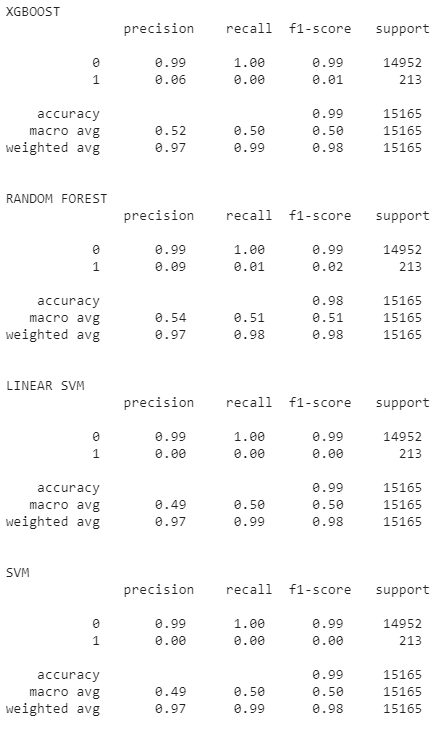

    
#### Version 2.0
<b>From this version onwards, Sampling techniques were added. This helped increase the score value greatly. The definition added was 'sampling(df)'. This technique manually applied undersampling. Some of the best scores achieved are shown below. Also, updates we done to Boosting. Along with other models, they were added to Bagging Classifier with parameters, and then passed to GridSearchCV.</b><br>

<b>Adaboost Baseline Sampling</b><br>
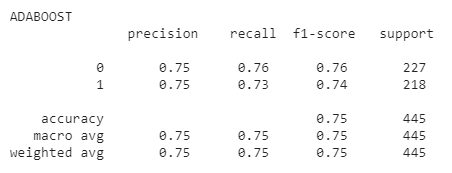

<b>RandomForest Skew Sampling</b><br>
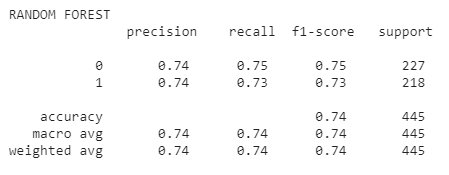

<b>XGBoost and RandomForest Scaling Sampling</b><br>
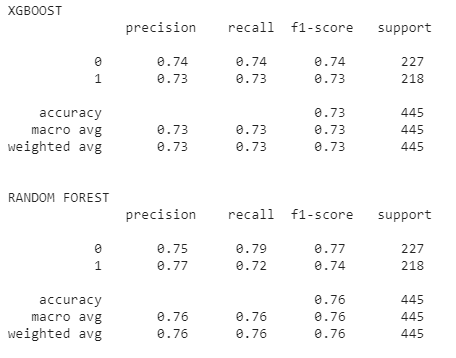
    
<b>Gradient Boosting GridSearch Sampling</b><br>
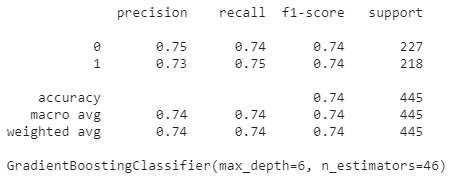
    
<b>LinearSVC Baseline Sampling</b><br>
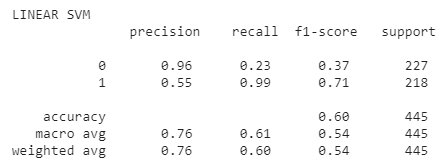
    
<b>LinearSVC Outliers Sampling</b><br>
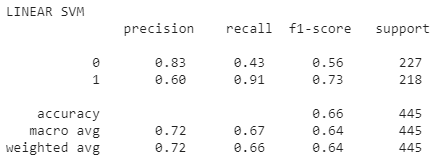
   

#### Final Version
<b>Here, we added the function 'under_sample()' and 'over_sample()'. All Boosting, Bagging, and GridSearch code blocks were changed to Raw in this version. Reason being that Over Sampling greatly increased the score values right from the Baseline models (screenshot below) onwards, especially for DecisionTree, XGBoost, and RandomForest.</b><br>

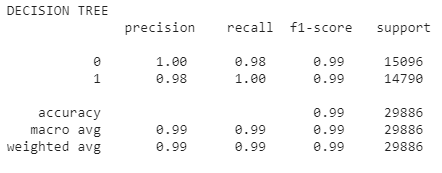

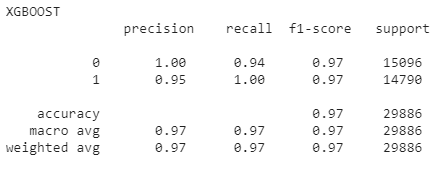

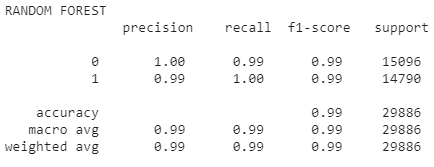

<b>Overall, RandomForest produced the best results. Even after some EDA and Preprocessing, the score for RandomForest we all the same as the above Baseline RandomForest model.</b><br>
<b>For this, we saved the model 'rfc_under' into a serial file through Pickle.</b><br>
